## Linear Regression on BMI Kaggle Dataset
Predict BMI from Height, Weight, and Gender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('bmi.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (500, 4)


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
print(df.info())
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

Missing values:
 Gender    0
Height    0
Weight    0
Index     0
dtype: int64


In [4]:

df['BMI'] = df['Weight'] / ((df['Height']/100)**2)

df['Gender_enc'] = LabelEncoder().fit_transform(df['Gender'])

df.head()


,Gender,Height,Weight,Index,BMI,Gender_enc
0,Male,174,96,4,31.708284,1
1,Male,189,87,2,24.355421,1
2,Female,185,110,4,32.140248,0
3,Female,195,104,3,27.350427,0
4,Male,149,61,3,27.476240,1


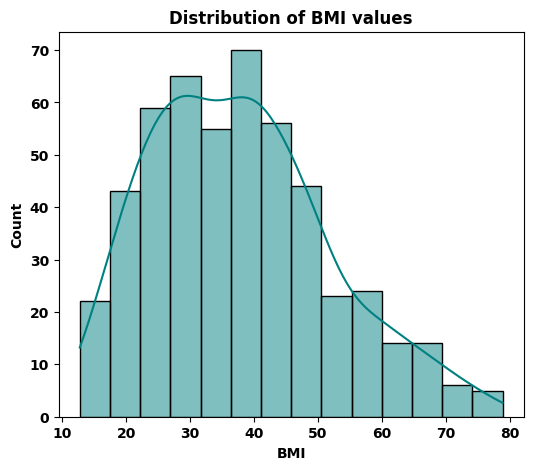

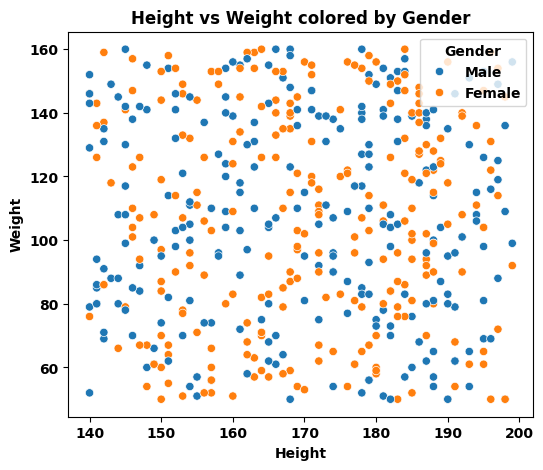

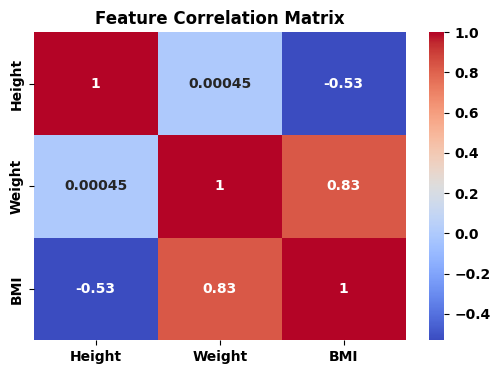

In [5]:
plt.figure(figsize=(6,5))
sns.histplot(df['BMI'], kde=True, color='teal')
plt.title("Distribution of BMI values")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)
plt.title("Height vs Weight colored by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Height','Weight','BMI']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [6]:
X = df[['Gender_enc', 'Height', 'Weight']]
y = df['BMI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("\nModel Coefficients:")
for name, coef in zip(['Gender','Height','Weight'], lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print("Intercept:", lr_model.intercept_)



Model Coefficients:
Gender: 0.0731
Height: -7.3093
Weight: 11.4088
Intercept: 37.70346623518482


In [8]:
y_pred = lr_model.predict(X_test)


In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Evaluation Metrics:
MAE: 1.89
MSE: 6.59
R² Score: 0.97


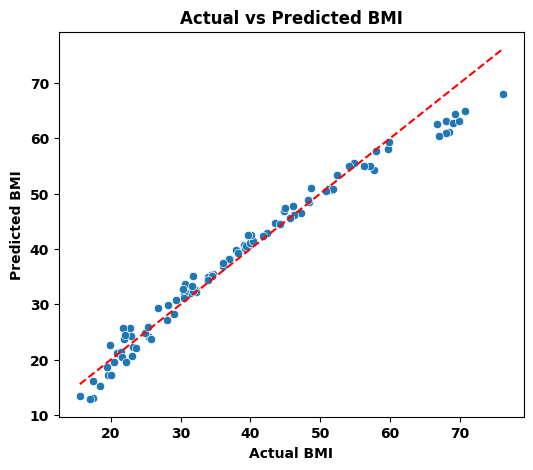

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.show()


In [11]:
sample = np.array([[1, 170, 65]])  # Male, 170cm, 65kg
sample_scaled = scaler.transform(sample)
predicted_bmi = lr_model.predict(sample_scaled)

print(f"\nExample Prediction: For Male, Height=170cm, Weight=65kg -> Predicted BMI={predicted_bmi[0]:.2f}")



Example Prediction: For Male, Height=170cm, Weight=65kg -> Predicted BMI=23.29


c:\Users\mcw\Desktop\Basic_ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
